In [246]:
import pandas as pd
import numpy as np

In [247]:
new_df = pd.read_csv('clean_kaggle_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [248]:
new_df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,20024,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",NaN,Automated hyperparameter tuning (e.g. hyperopt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto-Keras,Auto-Sklearn,Auto_ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
10725,20029,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,NaN,NaN,NaN,NaN,Na

In [249]:
new_df['Q4'] = new_df['Q4'].fillna('Missing')

## Question 1

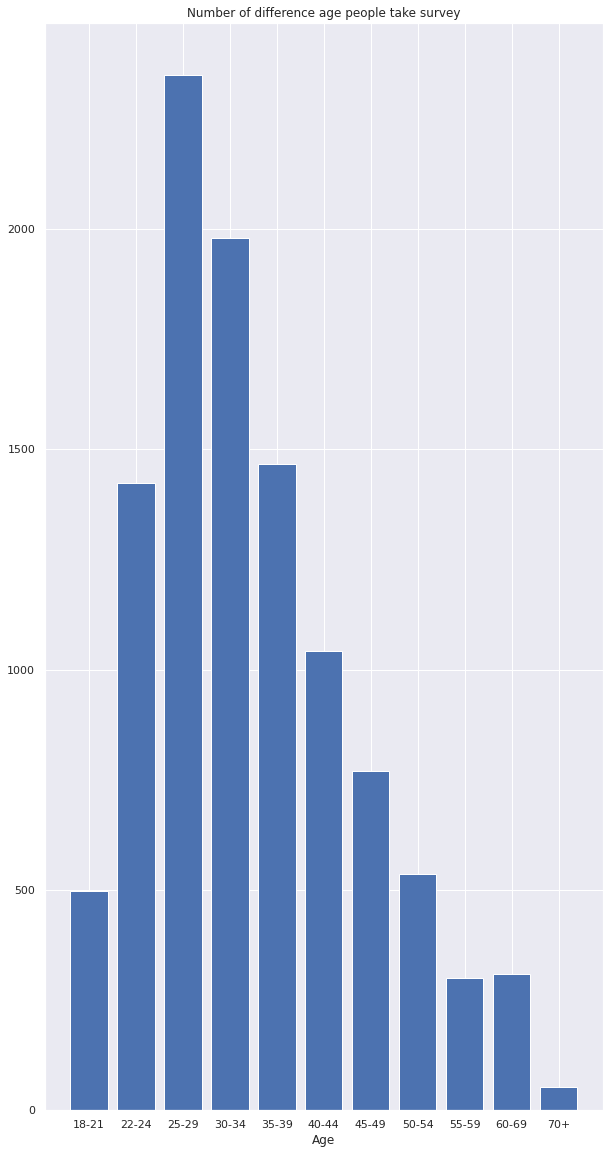

In [250]:
import matplotlib.pyplot as plt
labels, counts = np.unique(new_df['Q1'],return_counts=True)
plt.bar(labels,counts,align='center')
plt.gca().set_xticks(labels)
plt.xlabel('Age')
plt.title('Number of difference age people take survey')
plt.show()

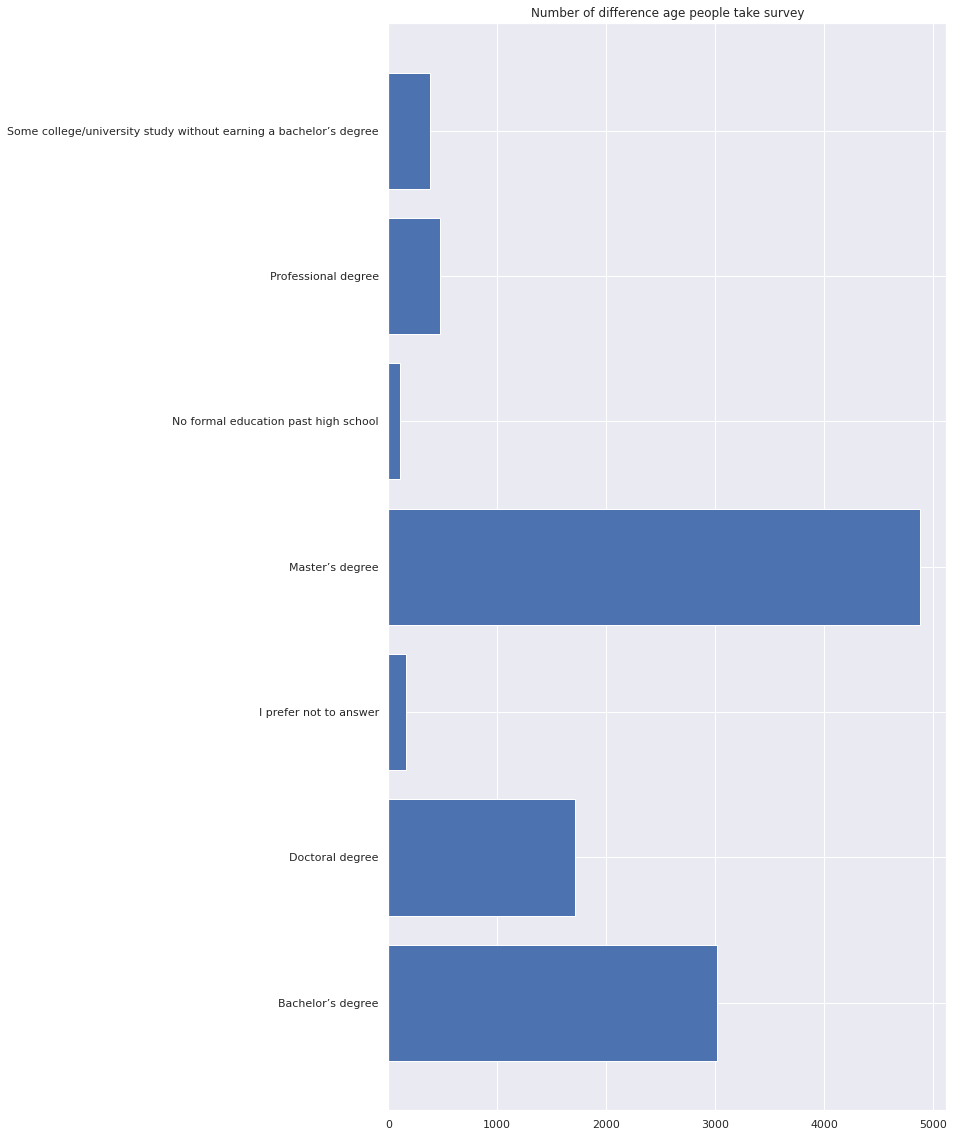

In [251]:
labels1, counts1 = np.unique(new_df['Q4'],return_counts=True)
#plt.figure(figsize=(40,10))
plt.barh(labels1,counts1,align='center')
#plt.gca().set_xticks(labels1)
#plt.xlabel('Age')
plt.title('Number of difference age people take survey')
plt.show()

In [252]:
new_df1 = new_df.dropna(subset=['Q24'])


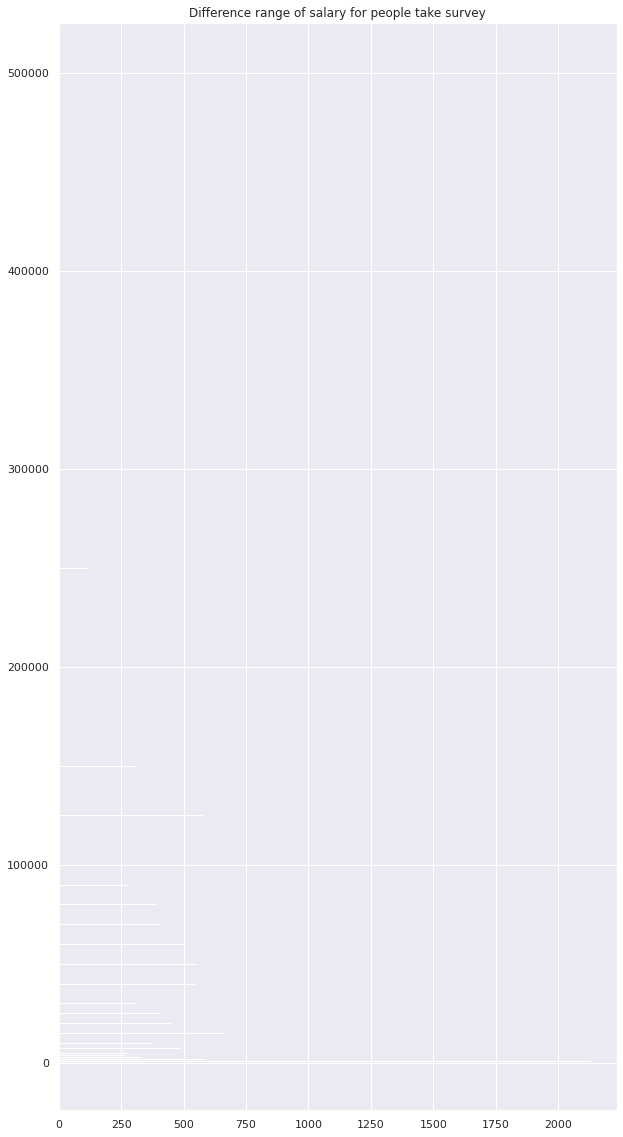

In [253]:
labels2, counts2 = np.unique(new_df1['Q24'],return_counts=True)
#plt.figure(figsize=(10,10))
plt.barh(labels2,counts2,align='center')
#plt.gca().set_xticks(labels2)
plt.title('Difference range of salary for people take survey')

plt.show()

# Question 2

In [254]:
def str_to_float(value):
    if isinstance(value, str):
        if '-' in value:
            temp = value.split('-')
            if ',' in temp[0]:
              new_temp0,new_temp1 = temp[0].split(','),temp[1].split(',')
              final_temp0,final_temp1 = new_temp0[0]+new_temp0[1], new_temp1[0]+new_temp1[1]
              return (float(final_temp0)+float(final_temp1))/2
            else:
              temp[0] = temp[0][1:]
              return (float(temp[0])+float(temp[1]))/2
        if '+' in value:
            a = value.split('+')
            return float(a[0])
        if value != "0":
          value = value[3:]
          value = value.split(',')
          value = value[0]+value[1]
          return float(value)
        else:
          return float(value)
    else:
        return value

In [255]:
#new_df1['Average_salary'] = new_df1['Q24'].apply(str_to_float)

In [256]:
new_df1['Average_age'] = new_df1['Q1'].apply(str_to_float)

In [257]:
#new_df1['Q2']

In [258]:
gender = []
for item in new_df1['Q2']:
  if item == 'Man':
    gender.append(1)
  elif item == 'Woman':
    gender.append(0)
  else:
    gender.append(2)
new_df1['New_gender'] = gender

In [259]:
new_df2 = new_df1[new_df1.New_gender!=2]

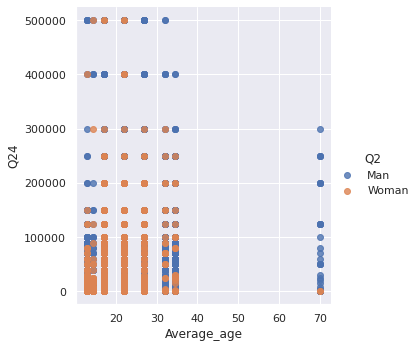

In [260]:
import seaborn as sns
sns.lmplot(x = 'Average_age',y = 'Q24',data = new_df2,fit_reg = False,hue="Q2")

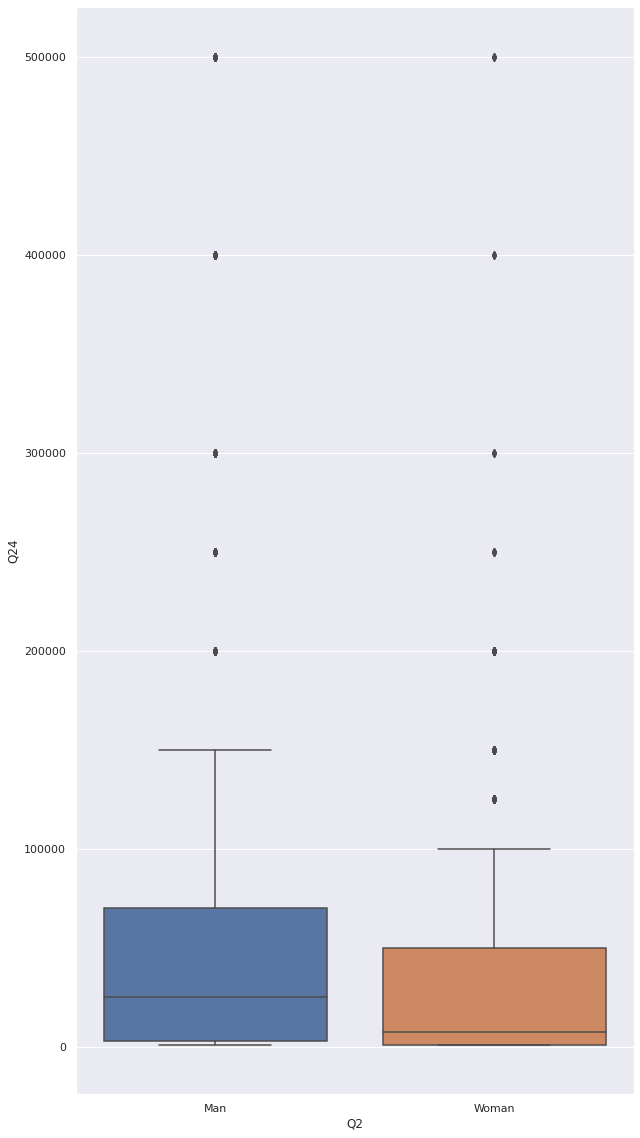

In [261]:
#sns.set(rc={'figure.figsize':(10,20)})
sns.boxplot(x='Q2', y='Q24', data=new_df2)


In [262]:
Male = new_df2.query('Q2 == "Man"')['Q24']
Female = new_df2.query('Q2 == "Woman"')['Q24']

In [263]:
new_df2.groupby('Q2').describe()

Unnamed: 0                                   ... New_gender               
           count          mean          std   min  ...        25%  50%  75%  max
Q2                                                 ...                          
Man       8872.0  10060.592426  5791.271583   1.0  ...        1.0  1.0  1.0  1.0
Woman     1683.0  10018.087344  5739.572403  20.0  ...        0.0  0.0  0.0  0.0

[2 rows x 40 columns]

In [264]:
from scipy import stats

In [265]:
stats.shapiro(Male)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.7018898725509644, 0.0)

In [266]:
stats.shapiro(Female)

(0.6343148946762085, 0.0)

In [267]:
stats.levene(Male, Female)

LeveneResult(statistic=42.415268379145644, pvalue=7.716969555891583e-11)

In [268]:
res = stats.ttest_ind(Male, Female,equal_var=True)

display(res)

Ttest_indResult(statistic=7.844333791744695, pvalue=4.77315104074462e-15)

In [269]:
replication = 1000
boot_mean_male = []
for i in range(replication):
  boot_male = np.random.choice(Male,replace = True,size = len(Male))
  boot_mean = np.mean(boot_male)
  boot_mean_male.append(boot_mean)
boot_mean_male = pd.DataFrame(boot_mean_male)


boot_mean_female = []
for i in range(replication):
  boot_female = np.random.choice(Female,replace = True,size = len(Female))
  boot_mean1 = np.mean(boot_female)
  boot_mean_female.append(boot_mean1)
boot_mean_female = pd.DataFrame(boot_mean_female)

In [270]:
Compare_salary = pd.concat([pd.DataFrame(boot_mean_male[0].reset_index(drop=True)),pd.DataFrame(boot_mean_female[0].reset_index(drop=True))],axis = 1)
Compare_salary.set_axis(['male_salary','female_salary'],axis = 1,inplace = True)
Compare_salary['Difference'] = Compare_salary['male_salary']-Compare_salary['female_salary']
Compare_salary

,male_salary,female_salary,Difference
0,52190.486925,38945.335710,13245.151215
1,50596.934175,37757.575758,12839.358417
2,51734.952660,36537.136067,15197.816594
3,49765.103697,34903.743316,14861.360382
4,50400.304328,37271.836007,13128.468321
...,...,...,...
995,50887.511271,38533.868093,12353.643179
996,51240.419297,35426.322044,15814.097253
997,50703.730839,36972.964944,13730.765895
998,50581.323264,36036.244801,14545.078463


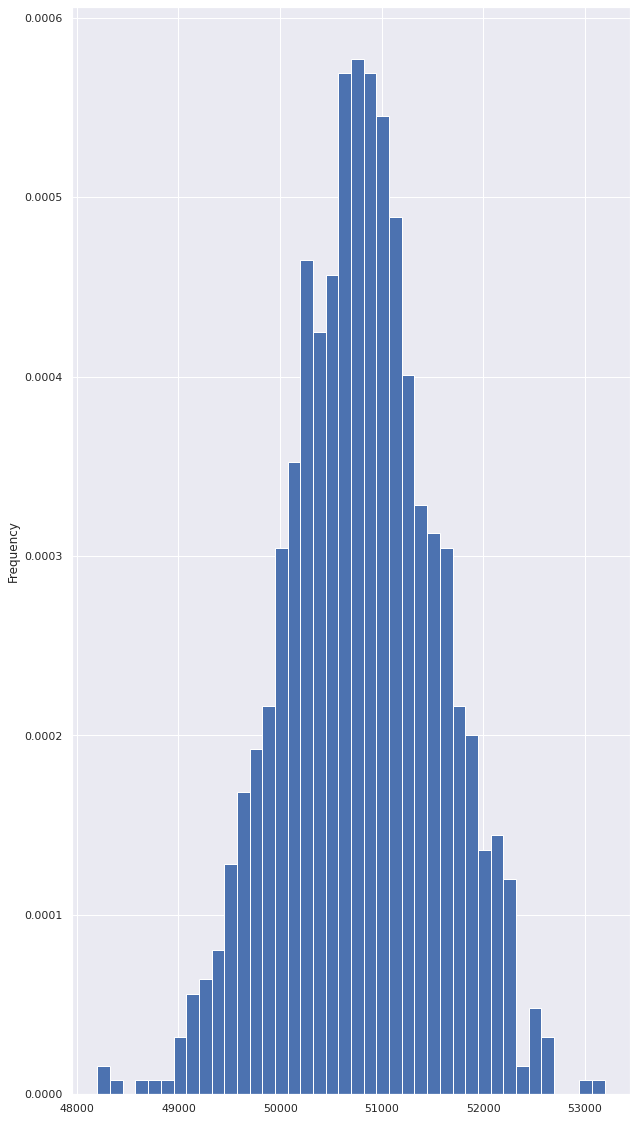

In [271]:
Compare_salary['male_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)

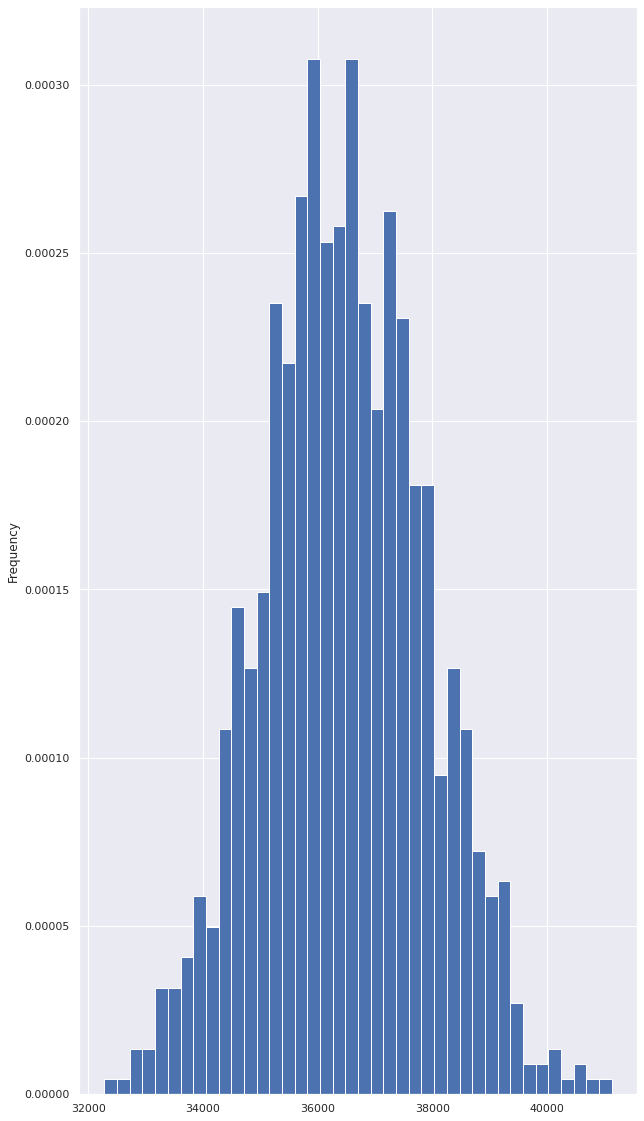

In [272]:
Compare_salary['female_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)

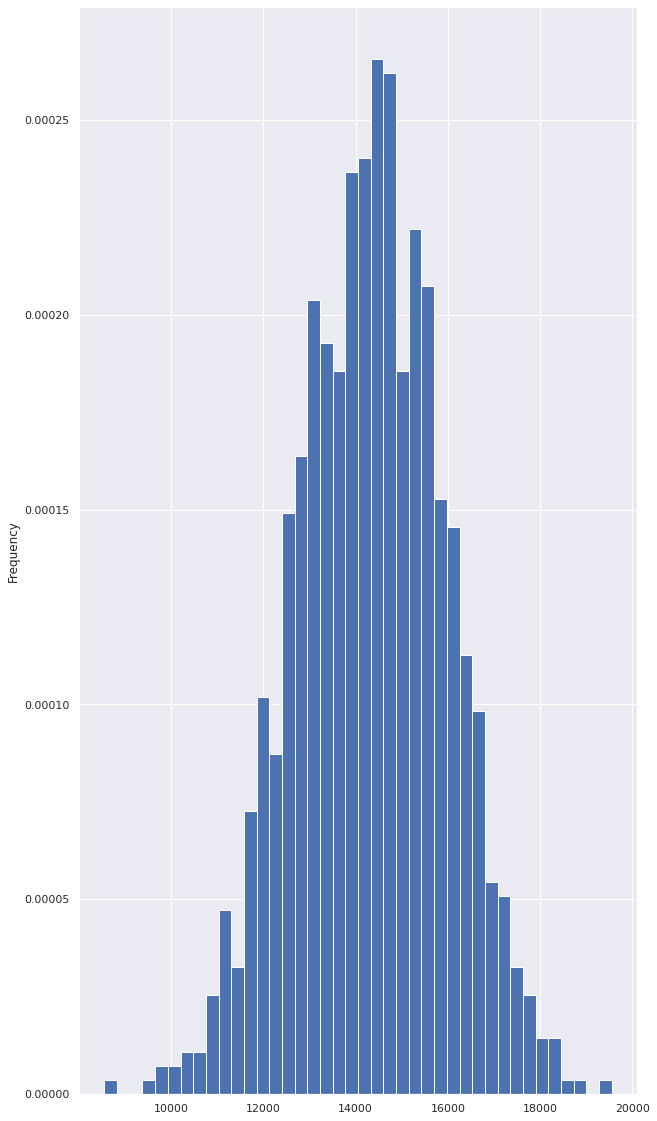

In [273]:
Compare_salary['Difference'].plot(kind = 'hist',rot = 0,bins = 40,density = True)

In [274]:
stats.shapiro(Compare_salary['male_salary'])

(0.9988094568252563, 0.7610019445419312)

In [275]:
stats.shapiro(Compare_salary['female_salary'])

(0.9988154172897339, 0.7648372054100037)

In [276]:
stats.levene(Compare_salary['male_salary'], Compare_salary['female_salary'])

LeveneResult(statistic=325.8993430392959, pvalue=1.3201589016373326e-67)

In [277]:
res = stats.ttest_ind(Compare_salary['male_salary'], Compare_salary['female_salary'],equal_var=True)

display(res)

Ttest_indResult(statistic=283.04658119120256, pvalue=0.0)

In [278]:
degree = []
for items in new_df1['Q4']:
  if items == "Master’s degree":
    degree.append(1)
  elif items == "Bachelor’s degree":
    degree.append(2)
  elif items == "Doctoral degree":
    degree.append(3)
  else:
    degree.append(0)
new_df1['degree'] = degree

In [279]:
new_df1['Q4'].value_counts()

Master’s degree                                                      4879
Bachelor’s degree                                                    3013
Doctoral degree                                                      1718
Professional degree                                                   470
Some college/university study without earning a bachelor’s degree     385
I prefer not to answer                                                158
No formal education past high school                                  106
Name: Q4, dtype: int64

In [280]:
new_df3 = new_df1[new_df1.degree != 0]

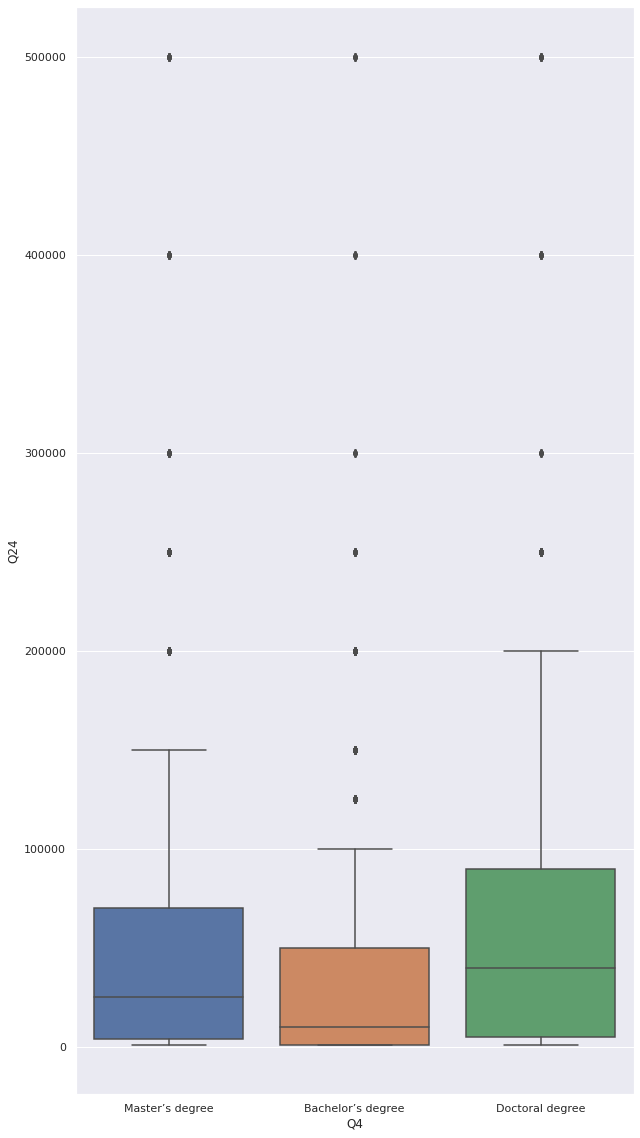

In [282]:
sns.boxplot(x='Q4', y='Q24', data=new_df3)

In [283]:
Master = new_df3.query('Q4 == "Master’s degree"')['Q24']
Bachelor = new_df3.query('Q4 == "Bachelor’s degree"')['Q24']
Doctoral = new_df3.query('Q4 == "Doctoral degree"')['Q24']

In [284]:
new_df3.groupby('Q4').describe()

Unnamed: 0                             ... degree          
                       count          mean          std  ...    50%  75%  max
Q4                                                       ...                 
Bachelor’s degree     3013.0  10033.975440  5777.534554  ...    2.0  2.0  2.0
Doctoral degree       1718.0   9992.813737  5746.418013  ...    3.0  3.0  3.0
Master’s degree       4879.0  10093.374872  5785.930202  ...    1.0  1.0  1.0

[3 rows x 48 columns]

In [285]:
fvalue, pvalue = stats.f_oneway(Master,Bachelor,Doctoral)
print(fvalue,pvalue)

129.7560112960932 2.4852074227874282e-56


In [286]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Q24 ~ C(Q4)', data=new_df3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Q4),1.237226e+12,2.0,129.756011,2.485207e-56
Residual,4.580148e+13,9607.0,NaN,NaN


In [287]:
replication = 1000
boot_mean_master = []
for i in range(replication):
  boot_master = np.random.choice(Master,replace = True,size = len(Master))
  boot_mean = np.mean(boot_master)
  boot_mean_master.append(boot_mean)
boot_mean_master = pd.DataFrame(boot_mean_master)


boot_mean_bachelor = []
for i in range(replication):
  boot_bachelor = np.random.choice(Bachelor,replace = True,size = len(Bachelor))
  boot_mean1 = np.mean(boot_bachelor)
  boot_mean_bachelor.append(boot_mean1)
boot_mean_bachelor = pd.DataFrame(boot_mean_bachelor)


boot_mean_doctoral = []
for i in range(replication):
  boot_doctoral = np.random.choice(Doctoral,replace = True,size = len(Doctoral))
  boot_mean2 = np.mean(boot_doctoral)
  boot_mean_doctoral.append(boot_mean2)
boot_mean_doctoral = pd.DataFrame(boot_mean_doctoral)

In [288]:
Compare_salary1 = pd.concat([pd.DataFrame(boot_mean_master[0].reset_index(drop=True)),pd.DataFrame(boot_mean_bachelor[0].reset_index(drop=True)),pd.DataFrame(boot_mean_doctoral[0].reset_index(drop=True))],axis = 1)
Compare_salary1.set_axis(['master_salary','bachelor_salary','doctor_salary'],axis = 1,inplace = True)
#Compare_salary['Difference'] = Compare_salary['male_salary']-Compare_salary['female_salary']
Compare_salary1

,master_salary,bachelor_salary,doctor_salary
0,53239.700758,38320.776635,68055.296857
1,52804.160689,36077.995353,67164.726426
2,51529.719205,35751.410554,72367.869616
3,53270.034843,35380.517756,64380.966240
4,52119.594179,37442.914039,70246.798603
...,...,...,...
995,50147.981144,33733.156323,69474.679860
996,50881.020701,35842.017922,65964.784633
997,52824.964132,34768.337205,64140.861467
998,53351.301496,34673.415201,69464.493597


In [ ]:
Compare_salary1['master_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)

In [ ]:
Compare_salary1['bachelor_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)

In [ ]:
Compare_salary1['doctor_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)

In [295]:
fvalue, pvalue = stats.f_oneway(Compare_salary1['master_salary'],Compare_salary1['bachelor_salary'],Compare_salary1['doctor_salary'])
print(fvalue,pvalue)

125256.64043639136 0.0


In [ ]:
bootstrap = pd.concat([pd.DataFrame(boot_mean_master[0].reset_index(drop=True)),pd.DataFrame(boot_mean_bachelor[0].reset_index(drop=True)),pd.DataFrame(boot_mean_doctoral[0].reset_index(drop=True))])
bootstrap.set_axis(['salary'],axis = 1,inplace = True)
Degree = []
for i in range(1000):
  Degree.append('Master')
for i in range(1000):
  Degree.append('bachelor')
for i in range(1000):
  Degree.append('Doctor')
bootstrap['degree'] = Degree
bootstrap

In [307]:
model = ols('salary ~ C(degree)', data=bootstrap).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(degree),5.443471e+11,2.0,125256.640436,0.0
Residual,6.512263e+09,2997.0,NaN,NaN
